In [451]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import eviltransform
from datetime import datetime
from datetime import date
from datetime import timedelta 
import time
import math
import glob
import pytz
import scipy as sp

# Training & Validation Data

In [452]:
# data set for training and validation
speed = pd.read_csv('speed_data_20161001_20161030.csv')

In [453]:
 # post-process the data by adding datatime information and select link_ids with less missing values
speed.datetime = pd.to_datetime(speed.datetime)

speed.speed = speed.speed.clip(0, 60)

speed['date'] = speed.datetime.dt.date

speed['time'] = speed.datetime.dt.time

speed['hour'] = speed.datetime.dt.hour

speed['minute'] = speed.datetime.dt.minute

speed['dayofweek'] = speed.datetime.dt.dayofweek

speed = speed[ (speed.hour >= 5) & (speed.hour <= 21)]

valid_link_id = speed.groupby('link_id').size()

valid_link_id = valid_link_id.reset_index()

valid_link_id.columns = ['link_id', 'count']

valid_link_id = valid_link_id[valid_link_id['count'] >= 5000]

speed = speed[speed.link_id.isin(valid_link_id.link_id)]

speed = speed.drop(columns=['Unnamed: 0'])

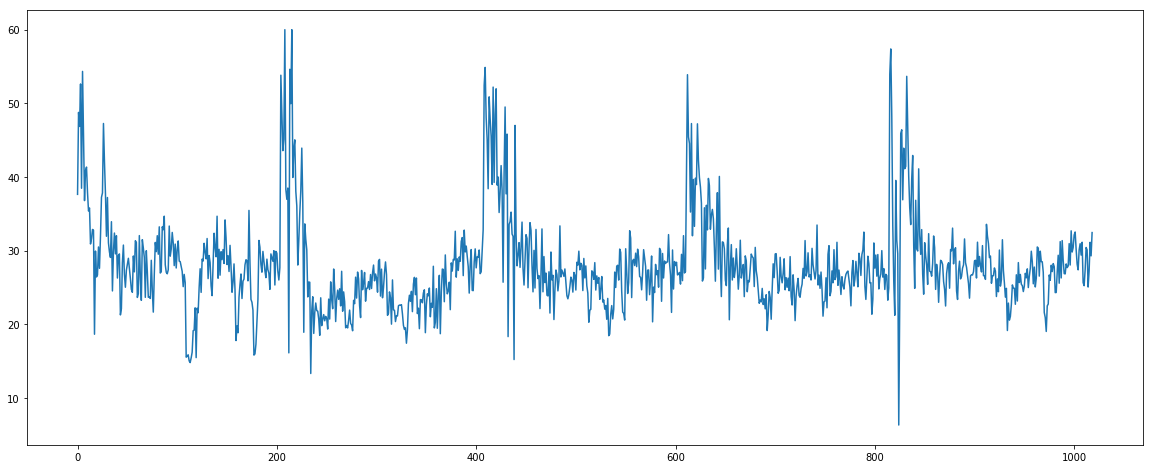

In [454]:
# Speed forwarding South
plt.figure(figsize=(20,8))
speed[ (speed.dayofweek == 6) & ((speed.link_id == 20045) | (speed.link_id == 10867)| (speed.link_id == 46))].groupby('datetime').speed.mean().reset_index().speed.plot()

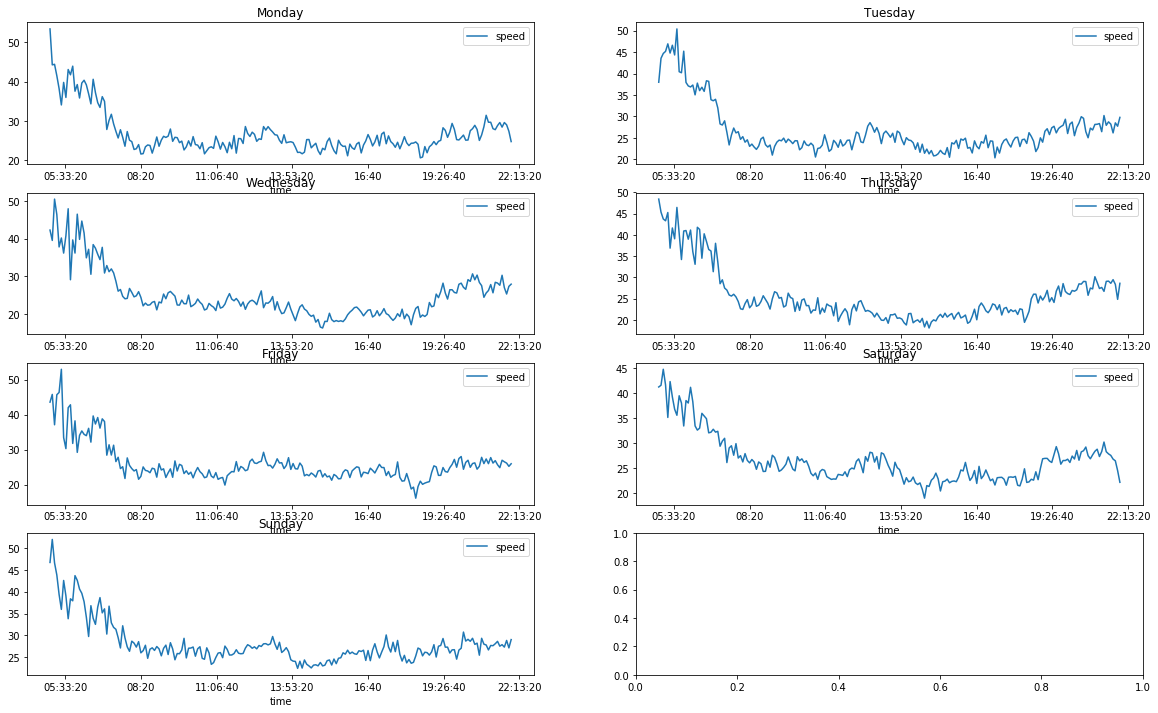

In [455]:
# Average Speed forwarding South 
speed_south = speed[((speed.link_id == 20045) | (speed.link_id == 10867)| (speed.link_id == 46))]
fig, axes = plt.subplots(nrows=4, ncols=2)
speed_south[(speed_south.dayofweek == 0)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Monday', figsize = (20, 12),ax=axes[0,0])
speed_south[(speed_south.dayofweek == 1)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Tuesday', ax=axes[0,1])
speed_south[(speed_south.dayofweek == 2)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Wednesday', ax=axes[1,0])
speed_south[(speed_south.dayofweek == 3)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Thursday', ax=axes[1,1])
speed_south[(speed_south.dayofweek == 4)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Friday', ax=axes[2,0])
speed_south[(speed_south.dayofweek == 5)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Saturday', ax=axes[2,1])
speed_south[(speed_south.dayofweek == 6)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Sunday', ax=axes[3,0])

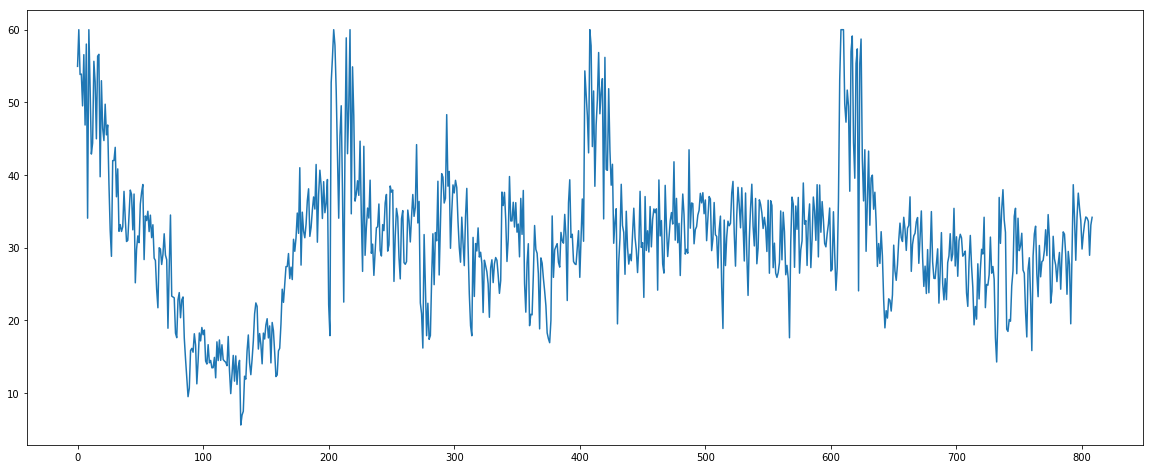

In [456]:
# Predicting Link's Speed forwarding North
plt.figure(figsize=(20,8))
speed[ (speed.dayofweek == 3) & ((speed.link_id == 20047) | (speed.link_id == 10866))].groupby('datetime').speed.mean().reset_index().speed.plot()

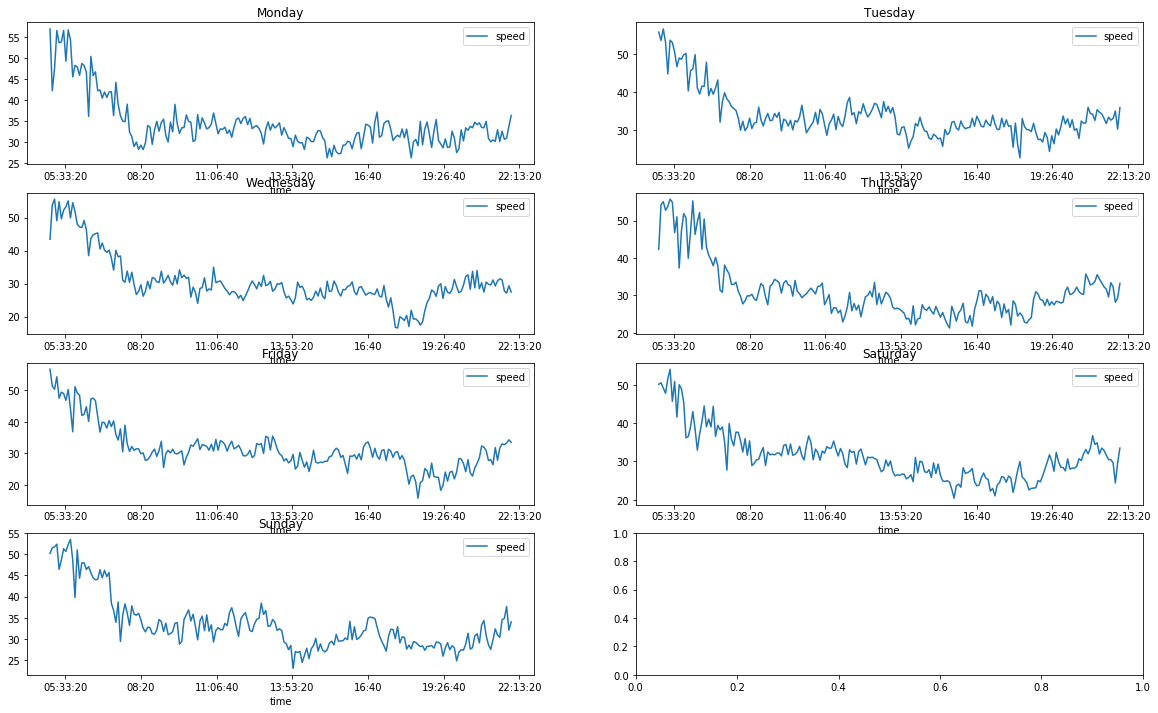

In [457]:
# Predicting Link's Speed Averaging by Day of Week forwarding North 
speed_north = speed[((speed.link_id == 20047) | (speed.link_id == 10866))]
fig, axes = plt.subplots(nrows=4, ncols=2)
speed_north[(speed_north.dayofweek == 0)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Monday', figsize = (20, 12),ax=axes[0,0])
speed_north[(speed_north.dayofweek == 1)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Tuesday', ax=axes[0,1])
speed_north[(speed_north.dayofweek == 2)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Wednesday', ax=axes[1,0])
speed_north[(speed_north.dayofweek == 3)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Thursday', ax=axes[1,1])
speed_north[(speed_north.dayofweek == 4)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Friday', ax=axes[2,0])
speed_north[(speed_north.dayofweek == 5)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Saturday', ax=axes[2,1])
speed_north[(speed_north.dayofweek == 6)].groupby(['time']).speed.mean().reset_index().plot(x = 'time', y = 'speed', title = 'Sunday', ax=axes[3,0])

In [458]:
speed_matrix = speed.pivot(index = 'datetime', columns = 'link_id', values = 'speed')

In [459]:
speed_matrix = speed_matrix.rename_axis(None, axis=1).reset_index().set_index('datetime')

In [460]:
speed_matrix_interp = speed_matrix.interpolate(method = 'linear', limit_direction = 'both')

In [461]:
# speed_matrix_interp['pred_north'] = speed_matrix_interp[[10866, 20047]].mean(axis = 1)

# speed_matrix_interp['pred_south'] = speed_matrix_interp[[46, 10867, 20045]].mean(axis = 1)

# speed_matrix_interp = speed_matrix_interp.drop(columns = [46, 10867, 20045, 10866, 20047])

In [462]:
# save the speed matrix for training
speed_matrix_interp.to_pickle('Training_speed_matrix_Didi_Xian_2016_Oct_01_30')

# Testing data

In [443]:
# dateset for testing
speed = pd.read_csv('speed_data_20161201.csv')

In [444]:
speed.datetime = pd.to_datetime(speed.datetime)

speed.speed = speed.speed.clip(0, 60)

speed['date'] = speed.datetime.dt.date

speed['time'] = speed.datetime.dt.time

speed['hour'] = speed.datetime.dt.hour

speed['minute'] = speed.datetime.dt.minute

speed['dayofweek'] = speed.datetime.dt.dayofweek

speed = speed[ (speed.hour >= 5) & (speed.hour <= 21)]

speed = speed[speed.link_id.isin(valid_link_id.link_id)]

In [446]:
speed = speed.drop(columns=['Unnamed: 0'])

In [447]:
speed_matrix = speed.pivot(index = 'datetime', columns = 'link_id', values = 'speed')

In [464]:
speed_matrix

,-4455,-3645,-3644,-3643,-3642,-3641,-3640,-3639,-3638,-3637,...,7376,7377,7461,10045,10866,10867,20045,20047,20866,20867
datetime,,,,,,,,,,,,,,,,,,,,,
2016-10-01 05:00:00,NaN,NaN,NaN,11.321077,31.811109,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49.668784,51.016157,47.796992,42.853816,50.704887,45.936030,22.426618
2016-10-01 05:05:00,NaN,NaN,NaN,NaN,30.689800,31.695990,46.194390,NaN,NaN,NaN,...,49.686866,51.786206,41.249264,5.896553,49.853508,41.756527,44.527881,43.499455,34.118335,19.917060
2016-10-01 05:10:00,NaN,NaN,NaN,NaN,NaN,NaN,9.572754,43.040537,51.303826,46.900432,...,NaN,NaN,NaN,47.576339,52.709231,41.993182,46.029340,37.473027,44.783136,45.474291
2016-10-01 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,38.439691,NaN,NaN,NaN,...,NaN,NaN,54.148231,33.067262,46.106295,47.292983,25.671759,32.570005,46.900396,11.970787
2016-10-01 05:20:00,NaN,NaN,NaN,NaN,NaN,NaN,44.335097,NaN,NaN,NaN,...,NaN,NaN,NaN,38.047663,50.874027,41.845071,40.787681,49.036963,37.458736,17.981820
2016-10-01 05:25:00,NaN,NaN,NaN,27.365949,NaN,NaN,41.258929,26.146461,51.303826,37.523092,...,54.412888,49.134171,41.537706,52.495644,53.133350,39.988001,24.374765,46.159389,44.291265,11.579350
2016-10-01 05:30:00,NaN,NaN,NaN,50.704887,42.336927,38.033136,49.325839,NaN,NaN,NaN,...,55.581380,53.626459,NaN,NaN,50.091937,44.824637,NaN,NaN,42.452368,15.411196
2016-10-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,35.331062,21.518702,60.000000,35.595758,...,NaN,NaN,NaN,42.077602,47.199768,53.586936,41.572834,37.172977,29.711520,11.488813
2016-10-01 05:40:00,NaN,NaN,NaN,17.297446,NaN,NaN,34.631642,36.419122,56.268712,NaN,...,35.173336,40.975830,NaN,43.522960,36.949249,51.631435,36.354375,10.118897,25.634260,15.192035


In [448]:
speed_matrix = speed_matrix.rename_axis(None, axis=1).reset_index().set_index('datetime')

In [449]:
speed_matrix_interp = speed_matrix.interpolate(method = 'linear', limit_direction = 'both')

In [450]:
speed_matrix_interp.to_pickle('Testing_speed_matrix_Didi_Xian_2016_Dec_01')